In [1]:
# install.packages("tidyverse")
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
banco <- read_csv("Autism_Data.csv") # Carregando o Dataframe, Banco de Dados para o estudo

Parsed with column specification:
cols(
  .default = col_double(),
  age = col_character(),
  gender = col_character(),
  ethnicity = col_character(),
  jundice = col_character(),
  austim = col_character(),
  contry_of_res = col_character(),
  used_app_before = col_character(),
  age_desc = col_character(),
  relation = col_character(),
  `Class/ASD` = col_character()
)

See spec(...) for full column specifications.



In [3]:
names(banco) # O banco tem 21 variaveis

[1] "A1_Score"        "A2_Score"        "A3_Score"        "A4_Score"       
 [5] "A5_Score"        "A6_Score"        "A7_Score"        "A8_Score"       
 [9] "A9_Score"        "A10_Score"       "age"             "gender"         
[13] "ethnicity"       "jundice"         "austim"          "contry_of_res"  
[17] "used_app_before" "result"          "age_desc"        "relation"       
[21] "Class/ASD"

In [4]:
banco <- banco %>% select(-(11:20)) # Para a regresão vamos avaliar apenas o AQ10 em relação ao resultado do teste

In [5]:
names(banco) # Retiramos o restante das colunas
names(banco)[11] <- "Has_autism" # Renomeamos a coluna com o resultado do teste
names(banco) # Nome final das colunas

[1] "A1_Score"  "A2_Score"  "A3_Score"  "A4_Score"  "A5_Score"  "A6_Score" 
 [7] "A7_Score"  "A8_Score"  "A9_Score"  "A10_Score" "Class/ASD"

[1] "A1_Score"   "A2_Score"   "A3_Score"   "A4_Score"   "A5_Score"  
 [6] "A6_Score"   "A7_Score"   "A8_Score"   "A9_Score"   "A10_Score" 
[11] "Has_autism"

In [6]:
sapply(banco,class) # Para correlacionar precisamos que todas as variaveis sejam numericas

A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
   A7_Score    A8_Score    A9_Score   A10_Score  Has_autism 
  "numeric"   "numeric"   "numeric"   "numeric" "character"

In [7]:
# Vamos transformando os resultados em 1 para YES e em 0 para NO
banco <- mutate(banco,Has_autism = ifelse(Has_autism == 'YES', 1 , 0))

In [8]:
head(banco) # banco normalizado

A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Has_autism
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,0,1,1,0,0,0
1,1,0,1,0,0,0,1,0,1,0
1,1,0,1,1,0,1,1,1,1,1
1,1,0,1,0,0,1,1,0,1,0
1,0,0,0,0,0,0,1,0,0,0
1,1,1,1,1,0,1,1,1,1,1


In [9]:
sapply(banco,class) # Para correlacionar precisamos que todas as variaveis sejam numericas

A1_Score   A2_Score   A3_Score   A4_Score   A5_Score   A6_Score   A7_Score 
 "numeric"  "numeric"  "numeric"  "numeric"  "numeric"  "numeric"  "numeric" 
  A8_Score   A9_Score  A10_Score Has_autism 
 "numeric"  "numeric"  "numeric"  "numeric"

In [10]:
cor(banco) # Calculando a correlação de uma variavel com todas as outras

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Has_autism
A1_Score,1.00000000,0.01153892,0.07409593,0.127814230,0.1693691,0.1101993,0.21753794,0.147639774,0.1454524,0.11841298,0.2976276
A2_Score,0.01153892,1.00000000,0.22392092,0.158997916,0.1538208,0.1858637,-0.04176797,0.035407855,0.2054210,0.06888252,0.3113817
A3_Score,0.07409593,0.22392092,1.00000000,0.412722059,0.2649274,0.2688462,0.07821574,0.017770943,0.3151130,0.16845393,0.4410737
A4_Score,0.12781423,0.15899792,0.41272206,1.000000000,0.3068064,0.2951523,0.15123645,0.008616695,0.3276726,0.21096769,0.4699452
A5_Score,0.16936910,0.15382084,0.26492742,0.306806350,1.0000000,0.3923545,0.23858945,0.102086359,0.3965817,0.26756094,0.5370043
A6_Score,0.11019932,0.18586369,0.26884619,0.295152296,0.3923545,1.0000000,0.17548921,0.100123128,0.4794218,0.29443495,0.5920910
A7_Score,0.21753794,-0.04176797,0.07821574,0.151236453,0.2385894,0.1754892,1.00000000,0.085403244,0.1894796,0.25210651,0.3514286
A8_Score,0.14763977,0.03540785,0.01777094,0.008616695,0.1020864,0.1001231,0.08540324,1.000000000,0.1017328,0.10078183,0.2371606
A9_Score,0.14545244,0.20542100,0.31511299,0.327672571,0.3965817,0.4794218,0.18947962,0.101732780,1.0000000,0.28333987,0.6355758
A10_Score,0.11841298,0.06888252,0.16845393,0.210967690,0.2675609,0.2944349,0.25210651,0.100781830,0.2833399,1.00000000,0.3859171


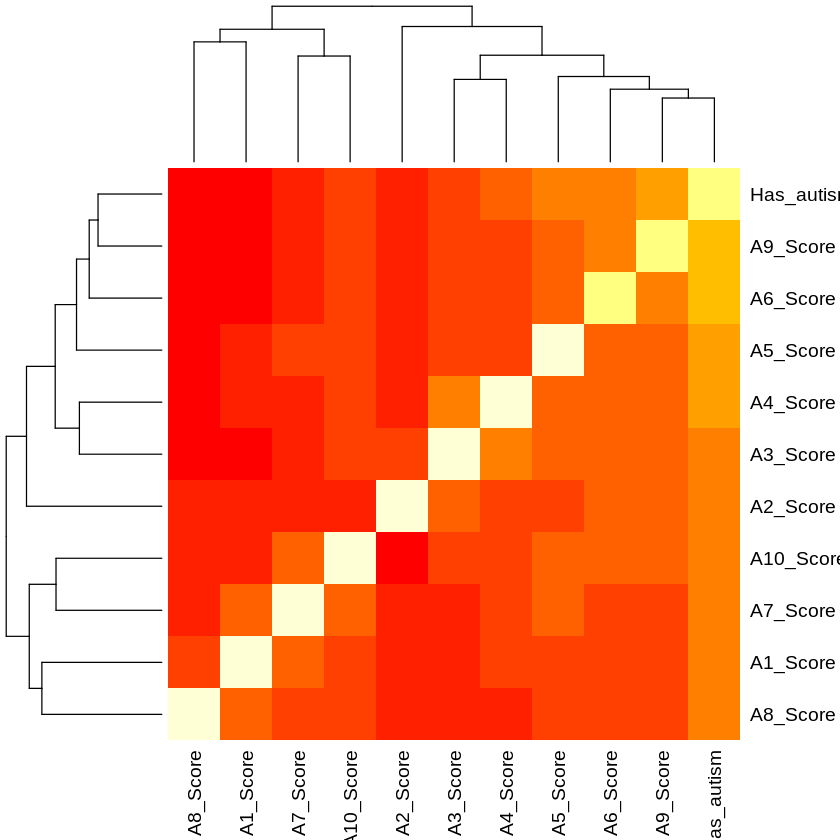

In [11]:
heatmap(abs(cor(banco))) # O grafico demonstra o grau de relacionamento entre as variaveis

In [17]:
# Has_autism tem forte relação com A9_Score
regressao <- lm(Has_autism ~ A9_Score, data = banco)

In [18]:
summary(regressao)


Call:
lm(formula = Has_autism ~ A9_Score, data = banco)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67544 -0.07353 -0.07353  0.32456  0.92647 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.07353    0.01570   4.682 3.41e-06 ***
A9_Score     0.60191    0.02760  21.812  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3426 on 702 degrees of freedom
Multiple R-squared:  0.404,	Adjusted R-squared:  0.4031 
F-statistic: 475.8 on 1 and 702 DF,  p-value: < 2.2e-16


In [ ]:
count(banco %>% filter(Has_autism==0))
count(banco %>% filter(Has_autism==1))